In [177]:
import pandas as pd
import numpy as np
import math
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import seaborn as sns

from datetime import datetime, timedelta, date
from dateutil import parser

pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None) 
df = pd.read_csv('SPX[1].csv')
df['Date'] = pd.to_datetime(df['Date'])

In [133]:
df['Year'] = df['Date'].dt.year
df = df[df['Date'].dt.year > 1975]
data = df
data.sort_values('Date', ascending =False)

data

,Date,Open,High,Low,Close,Adj Close,Volume,Year
12012,1976-01-02,90.190002,91.180000,89.809998,90.900002,90.900002,10300000,1976
12013,1976-01-05,90.900002,92.839996,90.849998,92.580002,92.580002,21960000,1976
12014,1976-01-06,92.580002,94.180000,92.370003,93.529999,93.529999,31270000,1976
12015,1976-01-07,93.529999,95.150002,92.910004,93.949997,93.949997,33170000,1976
12016,1976-01-08,93.949997,95.470001,93.410004,94.580002,94.580002,29030000,1976
...,...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,2020
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,2020
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,2020
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000,2020


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11311 entries, 12012 to 23322
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11311 non-null  datetime64[ns]
 1   Open       11311 non-null  float64       
 2   High       11311 non-null  float64       
 3   Low        11311 non-null  float64       
 4   Close      11311 non-null  float64       
 5   Adj Close  11311 non-null  float64       
 6   Volume     11311 non-null  int64         
 7   Year       11311 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 751.1 KB


In [137]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
count,11311,11311.000000,11311.000000,11311.000000,11311.000000,11311.000000,1.131100e+04,11311.000000
mean,1998-05-26 21:14:29.843515264,959.071760,964.744559,952.996819,959.270302,959.270302,1.581966e+09,1997.901600
min,1976-01-02 00:00:00,86.900002,87.519997,86.449997,86.900002,86.900002,7.580000e+06,1976.000000
25%,1987-03-11 12:00:00,250.959999,253.025002,248.835007,251.060005,251.060005,1.385150e+08,1987.000000
50%,1998-05-18 00:00:00,890.020020,899.070007,879.000000,890.229980,890.229980,6.274700e+08,1998.000000
75%,2009-08-12 12:00:00,1355.614990,1364.865051,1344.940002,1355.674988,1355.674988,3.159005e+09,2009.000000
max,2020-11-04 00:00:00,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,1.145623e+10,2020.000000
std,NaN,808.191562,812.266314,803.665181,808.244890,808.244890,1.806547e+09,12.946409


In [139]:
print(data.corr())

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.919760  0.920056  0.919469  0.919802   0.919802   
Open       0.919760  1.000000  0.999954  0.999929  0.999884   0.999884   
High       0.920056  0.999954  1.000000  0.999904  0.999938   0.999938   
Low        0.919469  0.999929  0.999904  1.000000  0.999943   0.999943   
Close      0.919802  0.999884  0.999938  0.999943  1.000000   1.000000   
Adj Close  0.919802  0.999884  0.999938  0.999943  1.000000   1.000000   
Volume     0.840181  0.739314  0.740713  0.737321  0.738987   0.738987   
Year       0.999755  0.919617  0.919915  0.919320  0.919660   0.919660   

             Volume      Year  
Date       0.840181  0.999755  
Open       0.739314  0.919617  
High       0.740713  0.919915  
Low        0.737321  0.919320  
Close      0.738987  0.919660  
Adj Close  0.738987  0.919660  
Volume     1.000000  0.840641  
Year       0.840641  1.000000  


<function matplotlib.pyplot.show(close=None, block=None)>

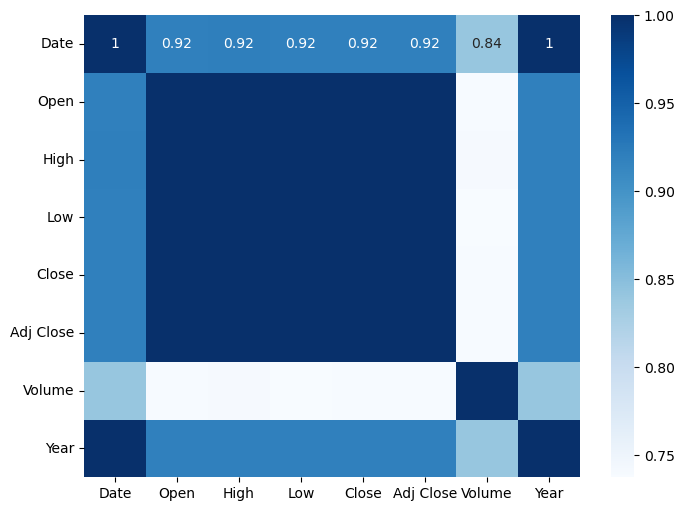

In [141]:
plt.figure(figsize=(8,6))

sns.heatmap(data.corr(), cmap= 'Blues',annot=True)
plt.show
           

C:\Users\xMsGT\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



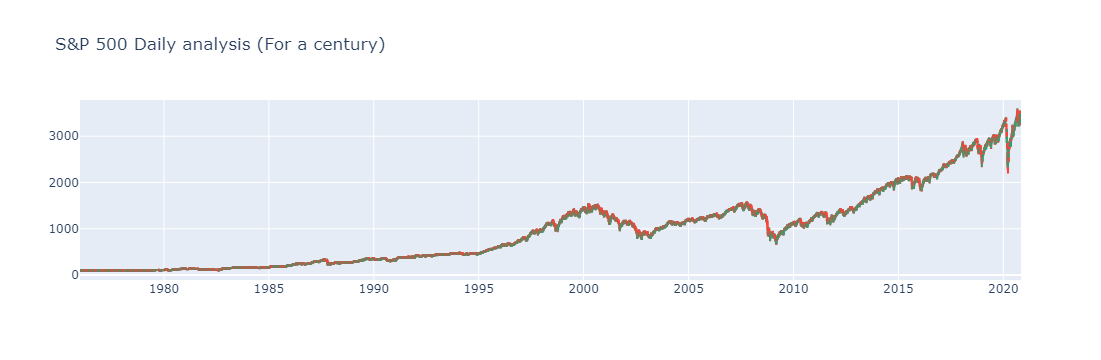

In [143]:
import plotly.graph_objects as go


figure = go.Figure(data=[go.Candlestick(x=data['Date'], 
                                        open=data['Open'], high=data['High'],
                                        low=data['Low'], close=df['Close'])])
figure.update_layout(title = "S&P 500 Daily analysis (For a century)", xaxis_rangeslider_visible=False)
figure.show()

In [147]:
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values 

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.20, random_state=0)

In [159]:
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (9048, 4)
Test: (2263, 4)


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm


regressor = LinearRegression()

model = regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
X_pred = regresso.predict(y_test)

In [167]:
predicted = regressor.predict(X_test)

In [169]:
predicted.shape

(2263,)

In [224]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price': y_test,'Predicted_Price':predicted})
print(dfr)

      Actual_Price  Predicted_Price
0       471.859985       470.691142
1       183.350006       183.461002
2      1265.949951      1277.342083
3       246.339996       246.388336
4       105.019997       105.422059
...            ...              ...
2258    122.699997       123.498662
2259    131.649994       132.706928
2260   1508.520020      1512.020190
2261   1249.130005      1253.643913
2262    156.779999       157.727200

[2263 rows x 2 columns]


In [196]:
dfr.describe()

,Actual Price,Predicted Price
count,2263.000000,2263.000000
mean,960.819483,960.848128
std,797.031586,797.037852
min,87.449997,87.253893
25%,263.604995,263.533735
50%,895.099976,894.302401
75%,1359.424988,1360.809141
max,3483.340088,3478.736083


Normality of residuals 

C:\Users\xMsGT\AppData\Local\Temp\ipykernel_55240\3106318481.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\xMsGT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='Density'>

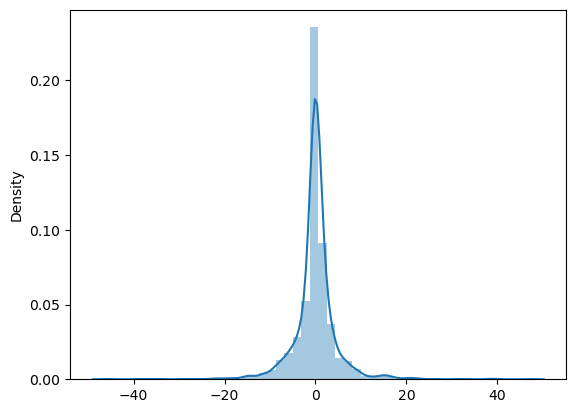

In [199]:
residual = y_test - predicted
sns.distplot(residual)

In [205]:
import scipy.stats
p_value = scipy.stats.norm.sf(abs(1.67))
print ('The p_value is equal to: ' + str(p_value) +'.')

The p_value is equal to: 0.04745968180294733.


In [209]:
result3 = sm.OLS(y_test, X_test).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.687e+07
Date:                Wed, 26 Jun 2024   Prob (F-statistic):                        0.00
Time:                        21:43:24   Log-Likelihood:                         -6800.8
No. Observations:                2263   AIC:                                  1.361e+04
Df Residuals:                    2259   BIC:                                  1.363e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6448      0.015    -42.314      0.000      -0.675      -0.615
x2             0.8489      0.014     61.850      0.000       0.822       0.876
x3             0.7958      0.011     71.599      0.000       0.774       0.818
x4          2.289e-10    8.7e-11      2.632      0.009    5.84e-11    3.99e-10
==============================================================================
Omnibus:                      596.325   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26114.510
Skew:                           0.458   Prob(JB):                         0.00
Kurtosis:                      19.617   Cond. No.                     4.56e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
x2 = abs( predicted- y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy:', round(accuracy, 2), '% ')


Accuracy: 99.72 % 


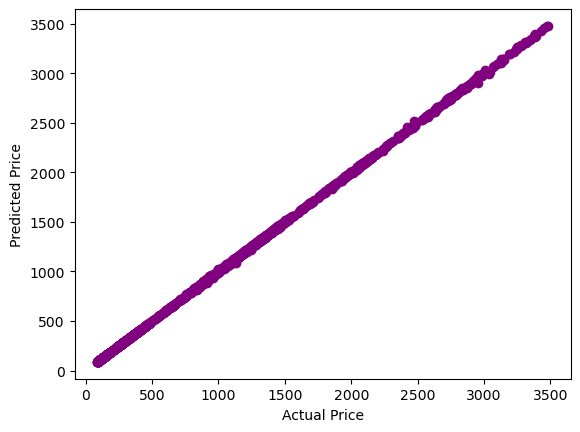

In [230]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color = 'Purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()